<a href="https://colab.research.google.com/github/shirishph/covariate_shift_detect/blob/main/covariate_shift_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy

In [133]:
total_bins = 50

total_training_samples = 5000
train_min = 5
train_max = 8

total_test_samples_1 = 10
test_min = 5
test_max = 18

In [134]:
train = np.random.randint(train_min, train_max, total_training_samples)
train_dist, train_bin_edges = np.histogram(train, bins=np.arange(total_bins), density=True)

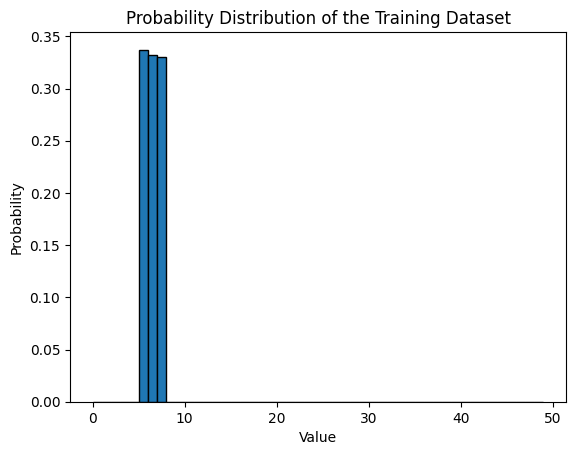

In [135]:
plt.hist(train, bins=np.arange(total_bins), density=True, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Distribution of the Training Dataset')
plt.show()

In [136]:
test = np.random.randint(train_min, train_max, total_test_samples_1)
test = np.concatenate((test, np.random.randint(test_min, test_max, total_test_samples_1)), axis=0)
test = np.concatenate((test, np.random.randint(train_min, train_max, total_test_samples_1)), axis=0)
test = np.concatenate((test, np.random.randint(test_min, test_max, total_test_samples_1)), axis=0)
test_dist, test_bin_edges = np.histogram(test, bins=np.arange(total_bins), density=True)

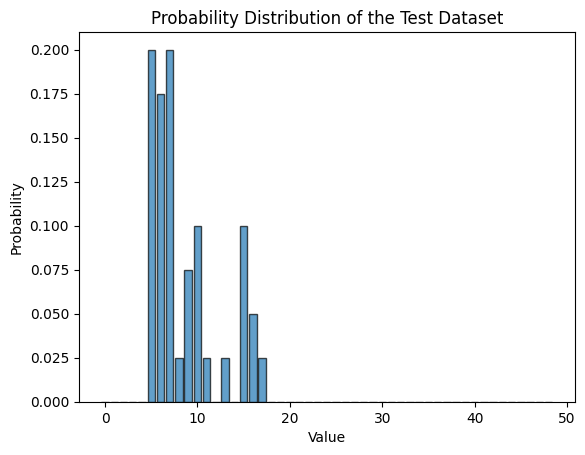

In [137]:
plt.bar(range(len(test_dist)), test_dist, edgecolor='k', alpha=0.7)
plt.title('Probability Distribution of the Test Dataset')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

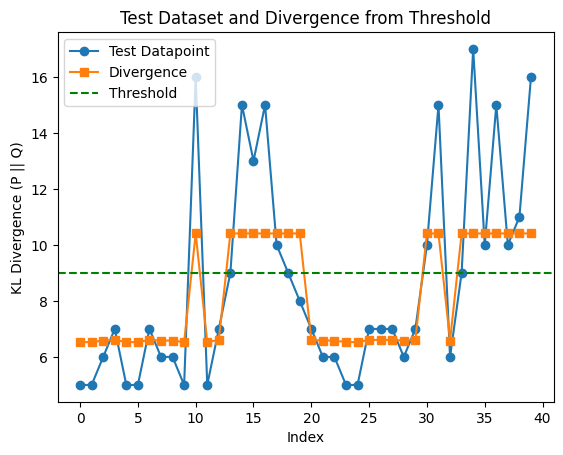

In [139]:
# Remove zeroes for KL divergence computation (avoid divide by zero)
train_dist[train_dist<=0.0] = 0.00001

temp = []
result = []
for index, var in enumerate(test):
  var_dist, var_bin_edges = np.histogram(var, bins=np.arange(total_bins), density=True)

  # Remove zeroes for KL divergence computation (avoid divide by zero)
  var_dist[var_dist<=0.0] = 0.00001

  kl_divergence = entropy(np.array(train_dist), np.array(var_dist)) # (reference, observation)

  temp.append(var)
  result.append(kl_divergence)

# Plot the array
plt.plot(np.array(temp), label="Test Datapoint", marker='o')
plt.plot(np.array(result), label="Divergence", marker='s')

# Add the labels and title
plt.axhline(y=9, color='g', linestyle='--', label='Threshold')
plt.xlabel('Index')
plt.ylabel('KL Divergence (P || Q)')
plt.title('Test Dataset and Divergence from Threshold')

# Add a legend
plt.legend()

# Show the plot
plt.show()